<a href="https://colab.research.google.com/github/kirtiman24/Movie-Recommendation-Engine/blob/master/MRipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import warnings

In [118]:
warnings.filterwarnings('ignore')

In [119]:
column_names=["user_id","item_id","ratings","timestamp"]
df=pd.read_csv("/content/u.data",sep='\t',names=column_names)

In [120]:
df.head(5)

,user_id,item_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [121]:
df.shape

(100000, 4)

In [122]:
df['user_id'].nunique()

943

In [123]:
movies_titles=pd.read_csv("/content/u.item",sep='\|',header=None)

In [124]:
movies_titles=movies_titles[[0,1]]

In [125]:
movies_titles.columns=['item_id','title']
movies_titles.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [126]:
df=pd.merge(df,movies_titles,on="item_id")

In [127]:
df.tail()

,user_id,item_id,ratings,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
sns.set_style('white')

In [130]:
df.groupby('title').mean()["ratings"].sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: ratings, dtype: float64

In [131]:
rating=pd.DataFrame(df.groupby('title').count()['ratings'])

In [132]:
rating.head()

,ratings
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


**Exploratory Data Analysis**

In [133]:
rating.sort_values(by='ratings',ascending=False)

,ratings
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"Great Day in Harlem, A (1994)",1
"Other Voices, Other Rooms (1997)",1
Good Morning (1971),1


In [139]:
rating['average rating']=pd.DataFrame(df.groupby('title').mean()['ratings'])

In [140]:
rating.head(5)

,ratings,average rating,average rating
title,,,
'Til There Was You (1997),9,2.333333,2.333333
1-900 (1994),5,2.600000,2.600000
101 Dalmatians (1996),109,2.908257,2.908257
12 Angry Men (1957),125,4.344000,4.344000
187 (1997),41,3.024390,3.024390


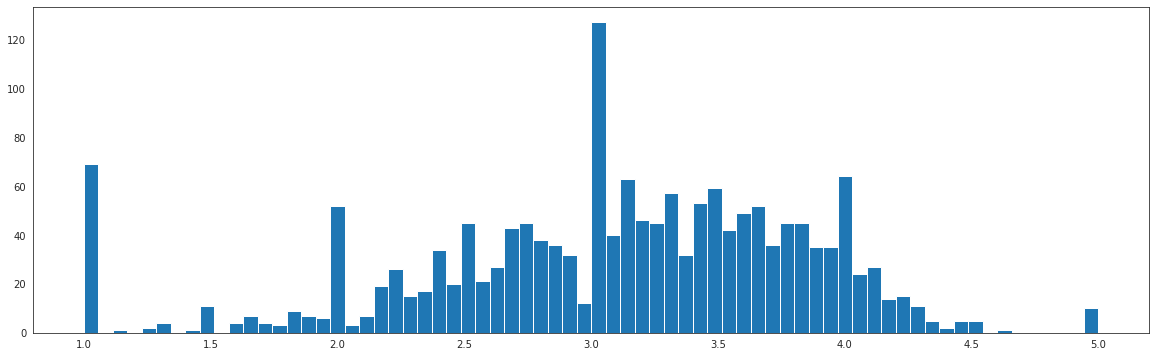

In [141]:
plt.figure(figsize=(20,6))
plt.hist(rating['average rating'],bins=70)
plt.show()

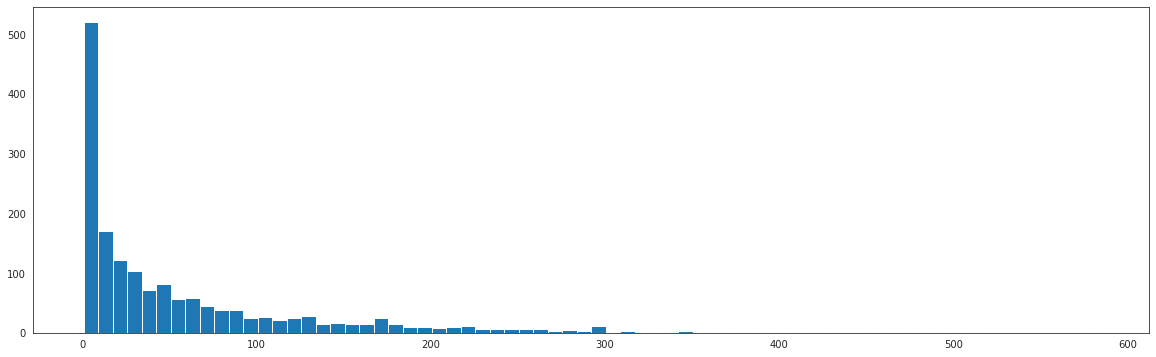

In [142]:
plt.figure(figsize=(20,6))
plt.hist(rating['ratings'],bins=70)
plt.show()

In [143]:
df.head(5)

,user_id,item_id,ratings,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [144]:
movie_matrix=df.pivot_table(index="user_id",columns="title",values="ratings")

In [145]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [146]:
rating.sort_values('ratings',ascending=False)

,ratings,average rating,average rating
title,,,
Star Wars (1977),583,4.358491,4.358491
Contact (1997),509,3.803536,3.803536
Fargo (1996),508,4.155512,4.155512
Return of the Jedi (1983),507,4.007890,4.007890
Liar Liar (1997),485,3.156701,3.156701
...,...,...,...
"Great Day in Harlem, A (1994)",1,5.000000,5.000000
"Other Voices, Other Rooms (1997)",1,3.000000,3.000000
Good Morning (1971),1,1.000000,1.000000


In [147]:
starwars_user_ratings=movie_matrix['Star Wars (1977)']

In [148]:
starwars_user_ratings.head(5)

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [149]:
similar_to_starwars=movie_matrix.corrwith(starwars_user_ratings)

In [150]:
similar_to_starwars.head(10)

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

In [151]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [152]:
corr_starwars.dropna

<bound method DataFrame.dropna of                                        Correlation
title                                             
'Til There Was You (1997)                 0.872872
1-900 (1994)                             -0.645497
101 Dalmatians (1996)                     0.211132
12 Angry Men (1957)                       0.184289
187 (1997)                                0.027398
...                                            ...
Young Guns II (1990)                      0.228615
Young Poisoner's Handbook, The (1995)    -0.007374
Zeus and Roxanne (1997)                   0.818182
unknown                                   0.723123
� k�ldum klaka (Cold Fever) (1994)             NaN

[1664 rows x 1 columns]>

In [153]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [154]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
corr_starwars=corr_starwars.join(rating['ratings'])

In [162]:
corr_starwars.head(5)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


**Movie Prediction Function**

In [168]:
def predict_movies(movie_name):
  movie_user_ratings=movie_matrix[movie_name]
  similar_to_movie=movie_matrix.corrwith(movie_user_ratings)

  corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
  corr_movie.dropna

  corr_movie=corr_movie.join(rating['ratings'])
  predictions=corr_movie[corr_movie['ratings']>100].sort_values('Correlation',ascending=False)


  return predictions

In [169]:
predictions=predict_movies("Titanic (1997)")

In [170]:
predictions.head(5)

,Correlation,ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


In [171]:
predictions=predict_movies("Edge, The (1997)")

In [172]:
predictions.head(10)

,Correlation,ratings
title,,
"Edge, The (1997)",1.000000,113
"Philadelphia Story, The (1940)",0.763763,104
Jungle2Jungle (1997),0.730877,132
Ace Ventura: Pet Detective (1994),0.723123,103
This Is Spinal Tap (1984),0.701123,191
Ed Wood (1994),0.624758,133
What's Eating Gilbert Grape (1993),0.603023,115
Volcano (1997),0.565053,219
Happy Gilmore (1996),0.556828,149
